### Run the test for one round

- To avoid keeping a big binary file


```bash
hackrf_transfer -r test_receive.bin -f 100000000 -s 2000000
```
> Returns
```powershell
call hackrf_set_sample_rate(2000000 Hz/2.000 MHz)
call hackrf_set_hw_sync_mode(0)
call hackrf_set_freq(100000000 Hz/100.000 MHz)
Stop with Ctrl-C
 3.9 MiB / 1.003 sec =  3.9 MiB/second, average power -39.2 dBfs
^CCaught signal 2
 1.3 MiB / 0.353 sec =  3.7 MiB/second, average power -39.2 dBfs

Exiting...
Total time: 1.35531 s
hackrf_stop_rx() done
hackrf_close() done
hackrf_exit() done
fclose() done
exit
```

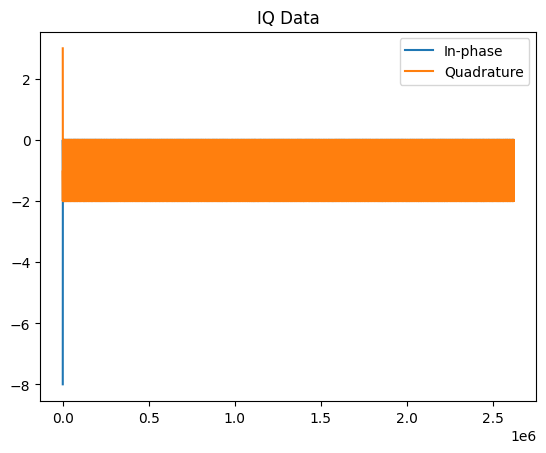

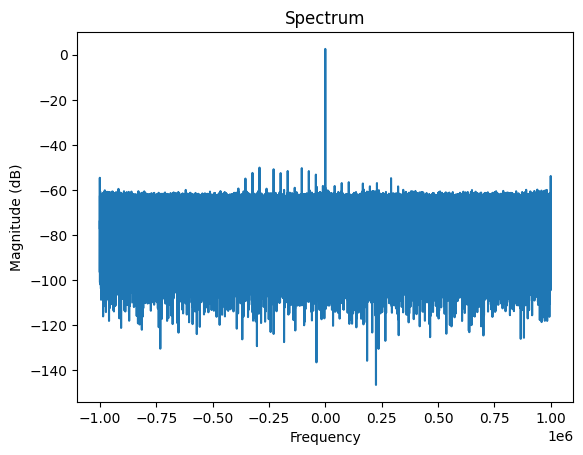

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Read the binary file
data = np.fromfile('test_receive.bin', dtype=np.int8)

# Convert to complex IQ
iq_data = data[::2] + 1j * data[1::2]

# Plot the waveform
plt.figure()
plt.plot(np.real(iq_data), label='In-phase')
plt.plot(np.imag(iq_data), label='Quadrature')
plt.legend()
plt.title("IQ Data")
plt.show()

# Plot spectrum
plt.figure()
plt.magnitude_spectrum(iq_data, Fs=2e6, scale='dB')
plt.title("Spectrum")
plt.show()
